In [100]:
#Import Necessities

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib as mp
from matplotlib import pyplot as plt
from pathlib import Path
import seaborn as sns
%matplotlib widget
%matplotlib inline

In [101]:
#Load in and designate source files, verified load in
stress_data=Path("corporate_stress_dataset.csv")
stress_df = pd.read_csv(stress_data)
stress_df.head()

,ID,Age,Gender,Marital_Status,Job_Role,Experience_Years,Monthly_Salary_INR,Working_Hours_per_Week,Commute_Time_Hours,Remote_Work,...,Work_Life_Balance,Family_Support_Level,Job_Satisfaction,Performance_Rating,Team_Size,Training_Opportunities,Gender_Bias_Experienced,Discrimination_Experienced,Burnout_Symptoms,Location
0,1,56,Non-Binary,Widowed,Developer,5,102703.08,44,1.72,True,...,9,2,5,10,38,False,True,True,No,Tier-3
1,2,46,Female,Single,Analyst,20,165583.91,54,0.62,True,...,9,1,10,9,72,True,True,True,No,Tier-3
2,3,32,Female,Single,Developer,10,38005.39,81,1.22,False,...,6,1,1,1,67,False,False,False,Yes,Metro
3,4,60,Female,Divorced,Analyst,26,51127.36,79,2.03,False,...,8,10,5,10,98,True,True,False,Yes,Metro
4,5,25,Male,Married,Sales,29,174597.45,63,1.45,True,...,3,1,9,2,85,True,False,False,No,Tier-1


In [102]:
#Create and renamed columns into a DF for easier comparison
factors_df = stress_df[[ 'Age', 'Gender', 'Marital_Status', 'Job_Role', 'Experience_Years',
       'Monthly_Salary_INR', 'Working_Hours_per_Week', 'Commute_Time_Hours',
       'Remote_Work', 'Stress_Level', 'Health_Issues', 'Company_Size',
       'Department', 'Sleep_Hours', 'Physical_Activity_Hours_per_Week',
       'Mental_Health_Leave_Taken', 'Manager_Support_Level',
       'Work_Pressure_Level', 'Annual_Leaves_Taken', 'Work_Life_Balance',
       'Family_Support_Level', 'Job_Satisfaction', 'Performance_Rating',
       'Team_Size', 'Training_Opportunities', 'Gender_Bias_Experienced',
       'Discrimination_Experienced', 'Burnout_Symptoms', 'Location']]
factors_df = factors_df.rename(columns={"Marital_Status": "Martial Status", "Job_Role":"Job role", "Experience_Years": "Years of Experience", "Monthly_Salary_INR": "Monthly Salary (Rupee)", "Working_Hours_per_Week": "Hours Worked per Week", "Commute_Time_Hours":"Hours Commuting", "Gender_Bias_Experienced":"Gender Bias Experienced?", "Stress_Level":"Stress Level 0 - 10", "Health_Issues":"Health Issues?", "Company_Size":"Company Size",  "Mental_Health_Leave_Taken":"Mental Health Leave Taken?", "Manager_Support_Level":"Manager Support Level", "Work_Pressure_Level":"Work Pressure Level", "Annual_Leaves_Taken":"Annual Level Taken?", "Work_Life_Balance":"Work Life Balance", "Family_Support_Level":"Familial Support  Level 1 - 10", "Job_Satisfaction":"Job Satisfaction", "Performance_Rating":"Performance Rating", "Team_Size":"Team Size", "Training_Opportunities":"Training Opportunities?", "Physical_Activity_Hours_per_Week":"Physical Activity Hours per Week", "Sleep_Hours": "Sleep Hours per Night", "Remote_Work":"Remote Work?", "Discrimination_Experienced":"Discrimination Experienced?", "Burnout_Symptom":"Burnout Symptoms?"}) 
inplace=True
factors_df.head()

,Age,Gender,Martial Status,Job role,Years of Experience,Monthly Salary (Rupee),Hours Worked per Week,Hours Commuting,Remote Work?,Stress Level 0 - 10,...,Work Life Balance,Familial Support Level 1 - 10,Job Satisfaction,Performance Rating,Team Size,Training Opportunities?,Gender Bias Experienced?,Discrimination Experienced?,Burnout_Symptoms,Location
0,56,Non-Binary,Widowed,Developer,5,102703.08,44,1.72,True,0,...,9,2,5,10,38,False,True,True,No,Tier-3
1,46,Female,Single,Analyst,20,165583.91,54,0.62,True,7,...,9,1,10,9,72,True,True,True,No,Tier-3
2,32,Female,Single,Developer,10,38005.39,81,1.22,False,7,...,6,1,1,1,67,False,False,False,Yes,Metro
3,60,Female,Divorced,Analyst,26,51127.36,79,2.03,False,6,...,8,10,5,10,98,True,True,False,Yes,Metro
4,25,Male,Married,Sales,29,174597.45,63,1.45,True,8,...,3,1,9,2,85,True,False,False,No,Tier-1


In [103]:
#Matrix to compare all factors against Stress levels
Correlation_markers=factors_df[["Age", "Years of Experience", "Monthly Salary (Rupee)", "Hours Worked per Week", "Hours Commuting","Remote Work?", "Stress Level 0 - 10", "Sleep Hours per Night", "Physical Activity Hours per Week", "Mental Health Leave Taken?", "Manager Support Level", "Work Pressure Level", "Work Life Balance", "Familial Support  Level 1 - 10", "Job Satisfaction", "Performance Rating", "Team Size", "Training Opportunities?", "Gender Bias Experienced?", "Discrimination Experienced?"]]
levels = 'Stress Level 0 - 10'
levels_corr= Correlation_markers.corr()[levels].sort_values(ascending=False)
print(levels_corr)

Stress Level 0 - 10                 1.000000
Work Pressure Level                 0.008016
Job Satisfaction                    0.004076
Training Opportunities?             0.003568
Remote Work?                        0.003220
Work Life Balance                   0.001780
Sleep Hours per Night               0.001483
Team Size                           0.001354
Age                                 0.001107
Familial Support  Level 1 - 10      0.000067
Mental Health Leave Taken?         -0.001830
Manager Support Level              -0.002869
Performance Rating                 -0.003717
Years of Experience                -0.003976
Physical Activity Hours per Week   -0.004479
Hours Commuting                    -0.004744
Monthly Salary (Rupee)             -0.005102
Gender Bias Experienced?           -0.005132
Hours Worked per Week              -0.005145
Discrimination Experienced?        -0.008360
Name: Stress Level 0 - 10, dtype: float64


C:\Users\Valky\AppData\Local\Temp\ipykernel_27912\996962022.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  levels_corr = levels_corr[Correlation_markers[levels]]


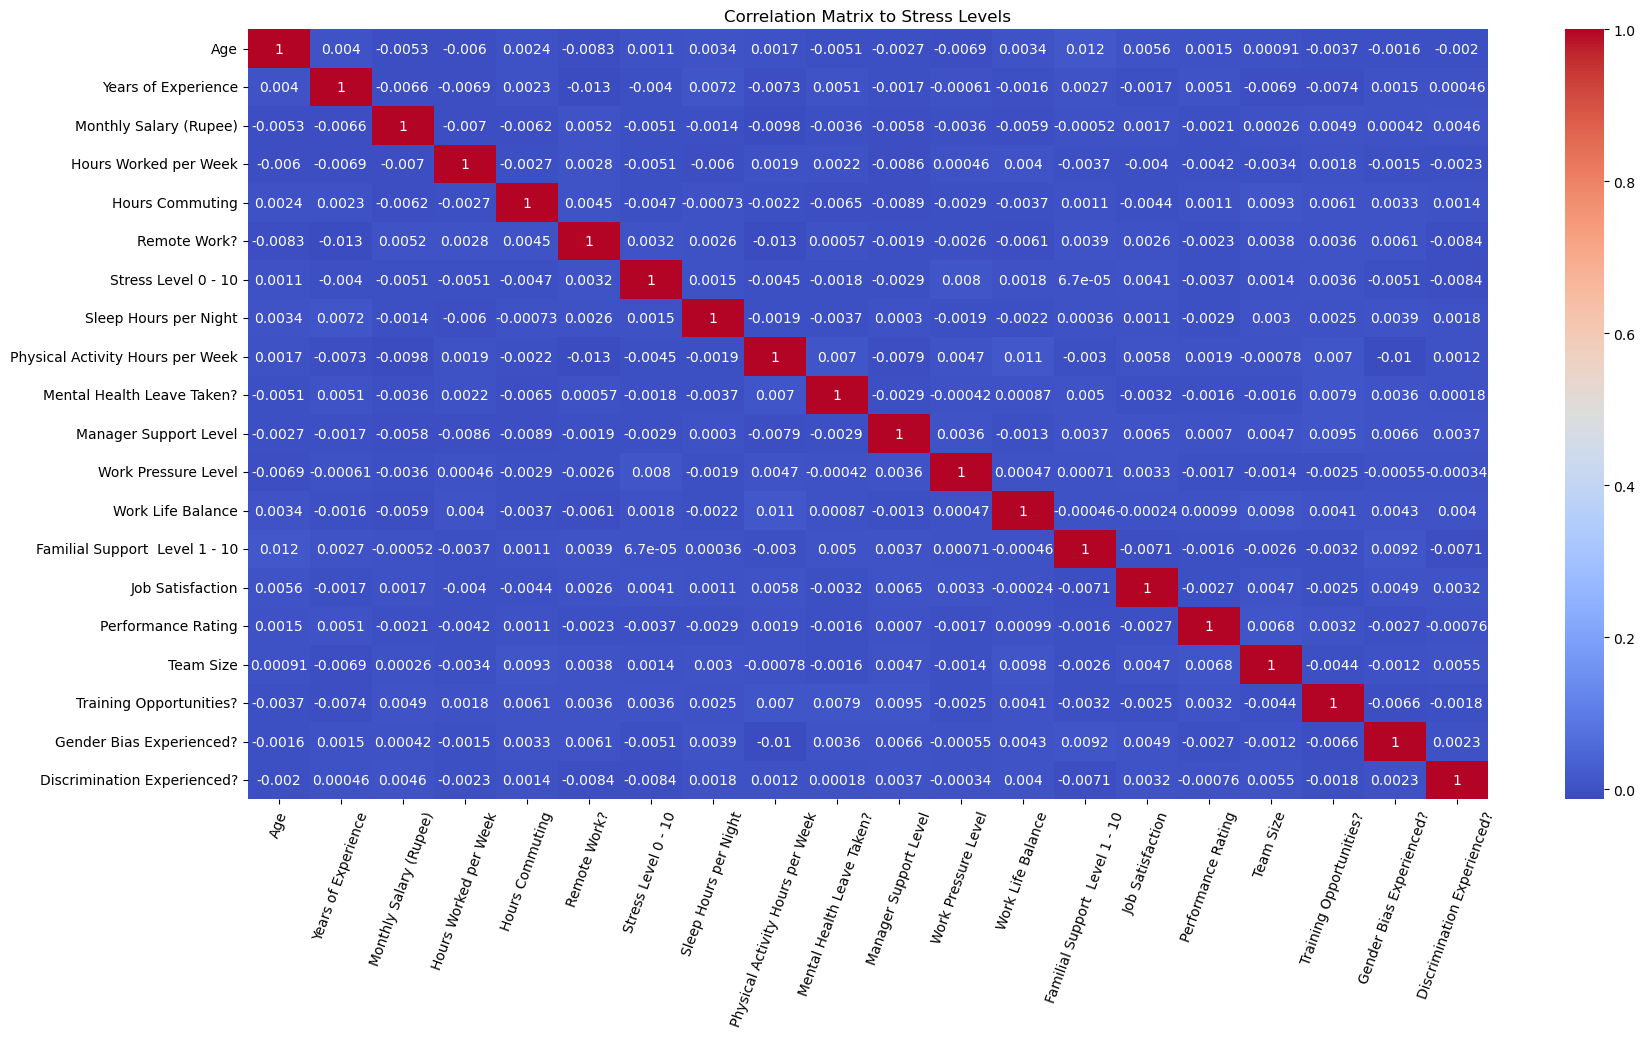

In [ ]:
#Heatmap of overall factors 
levels_corr = levels_corr[Correlation_markers[levels]]
plt.figure(figsize=(20, 10))
sns.heatmap(Correlation_markers.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix to Stress Levels')
plt.xticks(rotation=70)
plt.show()

In [ ]:
#Was useful in determining which data points to further focus on 
factors_df.describe()

,Age,Years of Experience,Monthly Salary (Rupee),Hours Worked per Week,Hours Commuting,Stress Level 0 - 10,Sleep Hours per Night,Physical Activity Hours per Week,Manager Support Level,Work Pressure Level,Annual Level Taken?,Work Life Balance,Familial Support Level 1 - 10,Job Satisfaction,Performance Rating,Team Size
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.00000
mean,41.518600,20.071580,110129.926165,62.53824,1.500454,5.004680,6.498888,5.011624,5.004120,5.004420,14.992300,4.996920,4.993940,4.98412,5.006940,50.49730
std,13.833279,11.835681,52069.676542,16.16981,0.867738,3.154745,1.437200,2.885061,3.160314,3.159614,8.943398,3.165728,3.160674,3.16003,3.176535,28.89238
min,18.000000,0.000000,20001.960000,35.00000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.00000
25%,30.000000,10.000000,64875.487500,49.00000,0.740000,2.000000,5.300000,2.500000,2.000000,2.000000,7.000000,2.000000,2.000000,2.00000,2.000000,25.00000
50%,41.000000,20.000000,110168.205000,62.00000,1.500000,5.000000,6.500000,5.000000,5.000000,5.000000,15.000000,5.000000,5.000000,5.00000,5.000000,51.00000
75%,54.000000,30.000000,155322.665000,77.00000,2.250000,8.000000,7.700000,7.500000,8.000000,8.000000,23.000000,8.000000,8.000000,8.00000,8.000000,75.00000
max,65.000000,40.000000,199992.800000,90.00000,3.000000,10.000000,9.000000,10.000000,10.000000,10.000000,30.000000,10.000000,10.000000,10.00000,10.000000,100.00000


In [106]:
#Bins categorizing Low, Medium, and high stress
binny=[0,3,6,10]
stressy_labels= ["Low Stress 0-3", "Mid Stress 4-6", "High Stress 7-10"]
stressy_depressy=pd.cut(factors_df["Stress Level 0 - 10"],bins=binny, labels= stressy_labels, include_lowest=True)
factors_df["Stress Bin"]=pd.cut(factors_df["Stress Level 0 - 10"], binny, stressy_labels, include_lowest=True)
print(stressy_depressy)

0          Low Stress 0-3
1        High Stress 7-10
2        High Stress 7-10
3          Mid Stress 4-6
4        High Stress 7-10
               ...       
49995      Low Stress 0-3
49996      Low Stress 0-3
49997      Mid Stress 4-6
49998      Mid Stress 4-6
49999    High Stress 7-10
Name: Stress Level 0 - 10, Length: 50000, dtype: category
Categories (3, object): ['Low Stress 0-3' < 'Mid Stress 4-6' < 'High Stress 7-10']


In [107]:
#Averages for each stress level bin
average_stressy= factors_df.groupby("Stress Bin")["Stress Level 0 - 10"].mean()
print(average_stressy)

Stress Bin
(-0.001, 3.0]    1.508718
(3.0, 6.0]       4.994530
(6.0, 10.0]      8.500413
Name: Stress Level 0 - 10, dtype: float64


C:\Users\Valky\AppData\Local\Temp\ipykernel_27912\2585394659.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_stressy= factors_df.groupby("Stress Bin")["Stress Level 0 - 10"].mean()


In [108]:
#Reset the averages
average_stressy_df=average_stressy.reset_index()
stressy_depressy_df= factors_df.merge(average_stressy_df, on='Stress Bin', how='left', suffixes=('', '_average'))

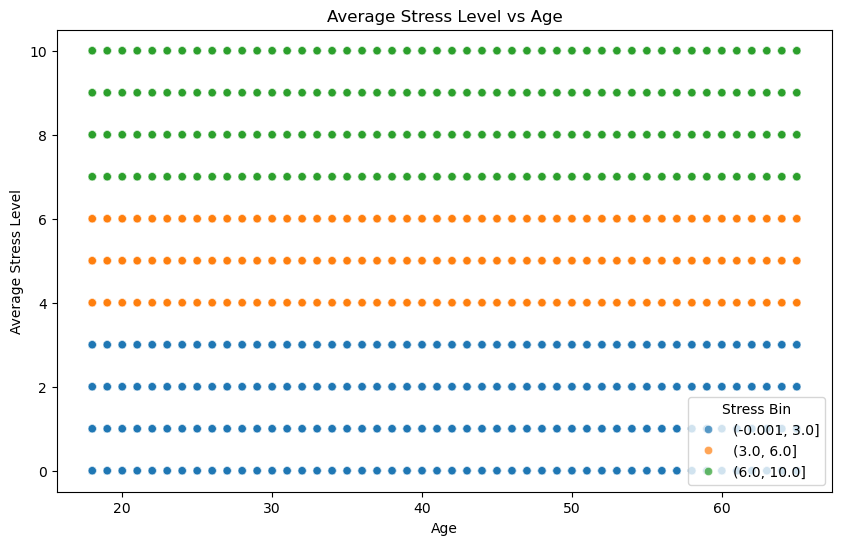

In [109]:
#Not so scattered Scatter Plot showing no correlation between stress levels and age, seperated by bin levels
plt.figure(figsize=(10, 6))
sns.scatterplot(data=stressy_depressy_df, x='Age', y='Stress Level 0 - 10', hue='Stress Bin', alpha=0.7)
plt.title('Average Stress Level vs Age')
plt.xlabel('Age')
plt.ylabel('Average Stress Level')
plt.legend(title='Stress Bin')
plt.show()

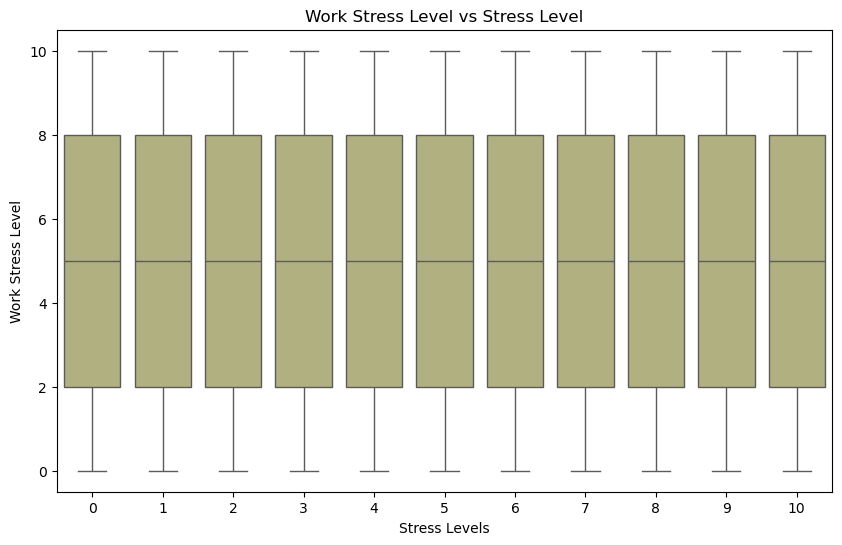

In [ ]:
#Box and Wisk of Work Stress levels vs Stress levels, this had the highest correlation metric of 0.008 degress, but still no discernable characteristics
plt.figure(figsize=(10, 6))
sns.boxplot(data=stressy_depressy_df, x='Stress Level 0 - 10', y='Work Pressure Level', color='#B8B878') 
plt.title('Work Stress Level vs Stress Level')
plt.xlabel('Stress Levels')
plt.ylabel('Work Stress Level')
#plt.legend(title='Stress Bin')
plt.show()

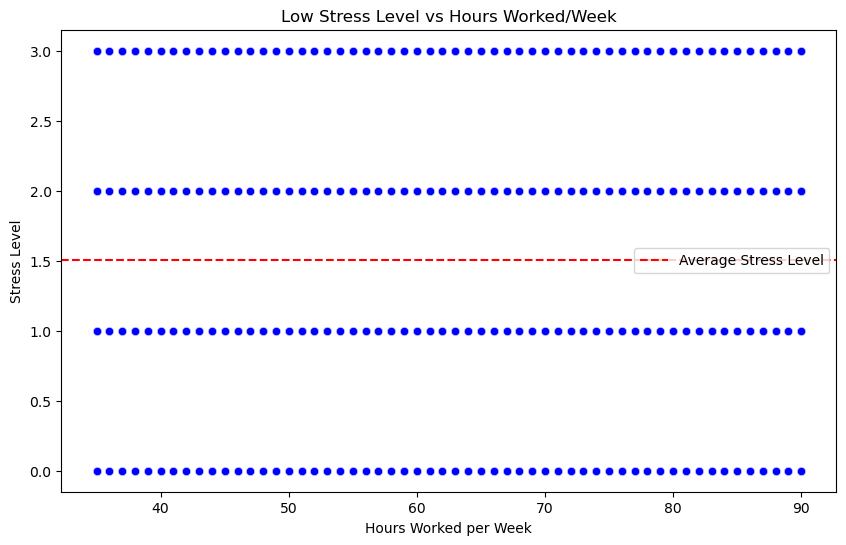

In [110]:
#Scatter Plot testing a difference in low stress bins and hours worked per week, no discernable difference
low_stressy_df = stressy_depressy_df[stressy_depressy_df["Stress Bin"] == pd.Interval(-0.001, 3.0)]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=low_stressy_df, x='Hours Worked per Week', y='Stress Level 0 - 10', color='blue', alpha=0.7)
plt.title('Low Stress Level vs Hours Worked/Week')
plt.xlabel('Hours Worked per Week')
plt.ylabel('Stress Level')
plt.axhline(y=low_stressy_df['Stress Level 0 - 10'].mean(), color='red', linestyle='--', label='Average Stress Level')
plt.legend()
plt.show()

C:\Users\Valky\AppData\Local\Temp\ipykernel_27912\1459252662.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


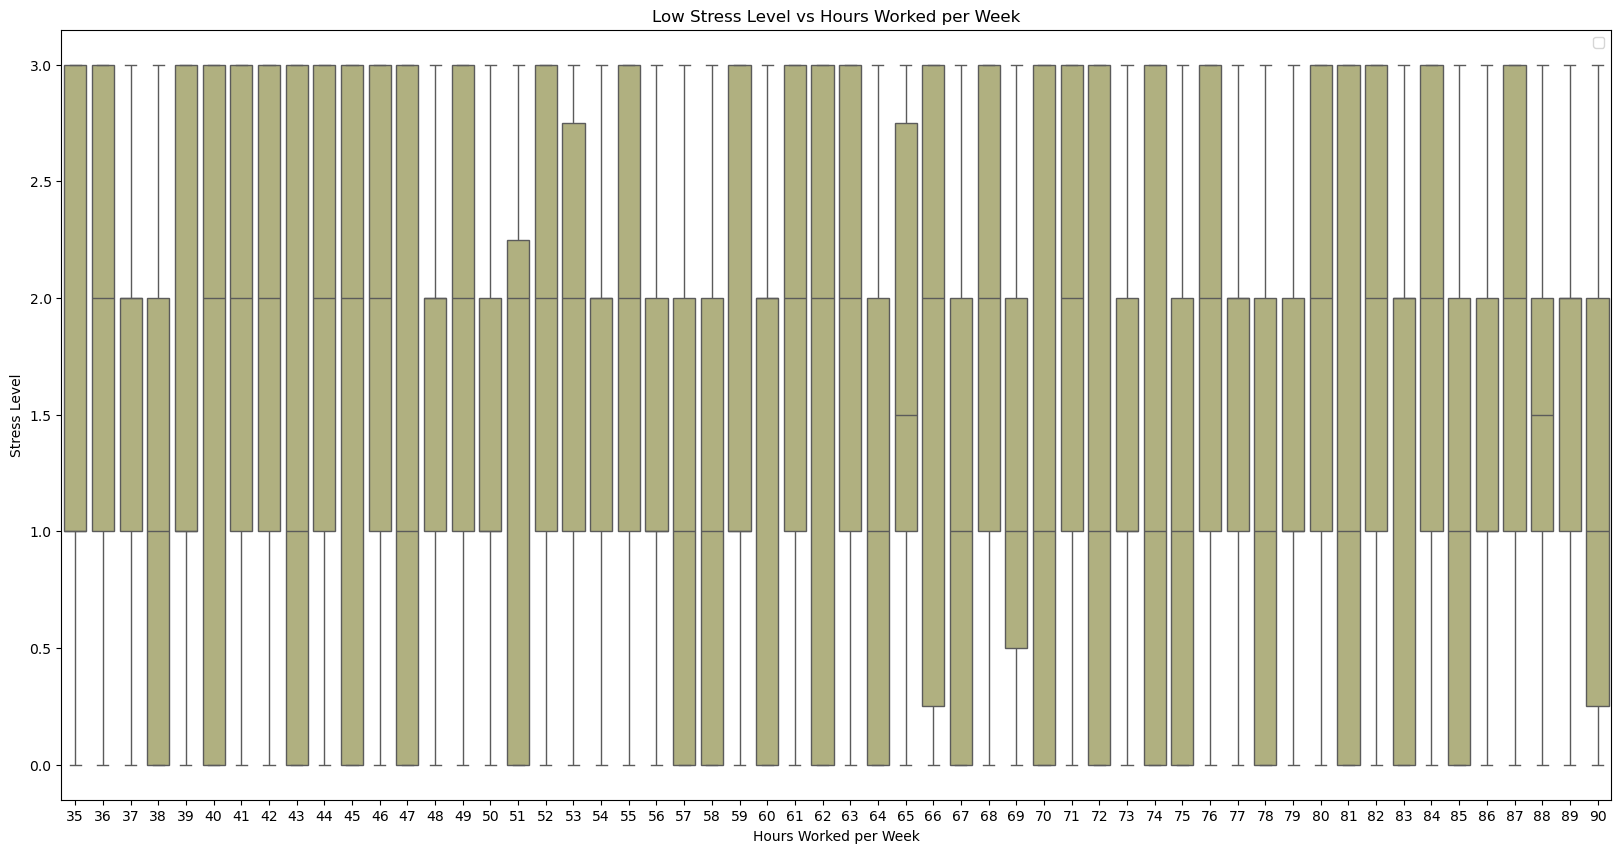

In [111]:
#Box plot on Low Stress V Hours worked per week, why is someone working 90 hours a week have a 0 stress level
low_stressy_df = stressy_depressy_df[stressy_depressy_df["Stress Bin"] == pd.Interval(-0.001, 3.0)]
plt.figure(figsize=(20, 10))
sns.boxplot(data=low_stressy_df, x='Hours Worked per Week', y='Stress Level 0 - 10', color='#B8B878')
plt.title('Low Stress Level vs Hours Worked per Week')
plt.xlabel('Hours Worked per Week')
plt.ylabel('Stress Level')
plt.legend()
plt.show()

C:\Users\Valky\AppData\Local\Temp\ipykernel_27912\2558620557.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


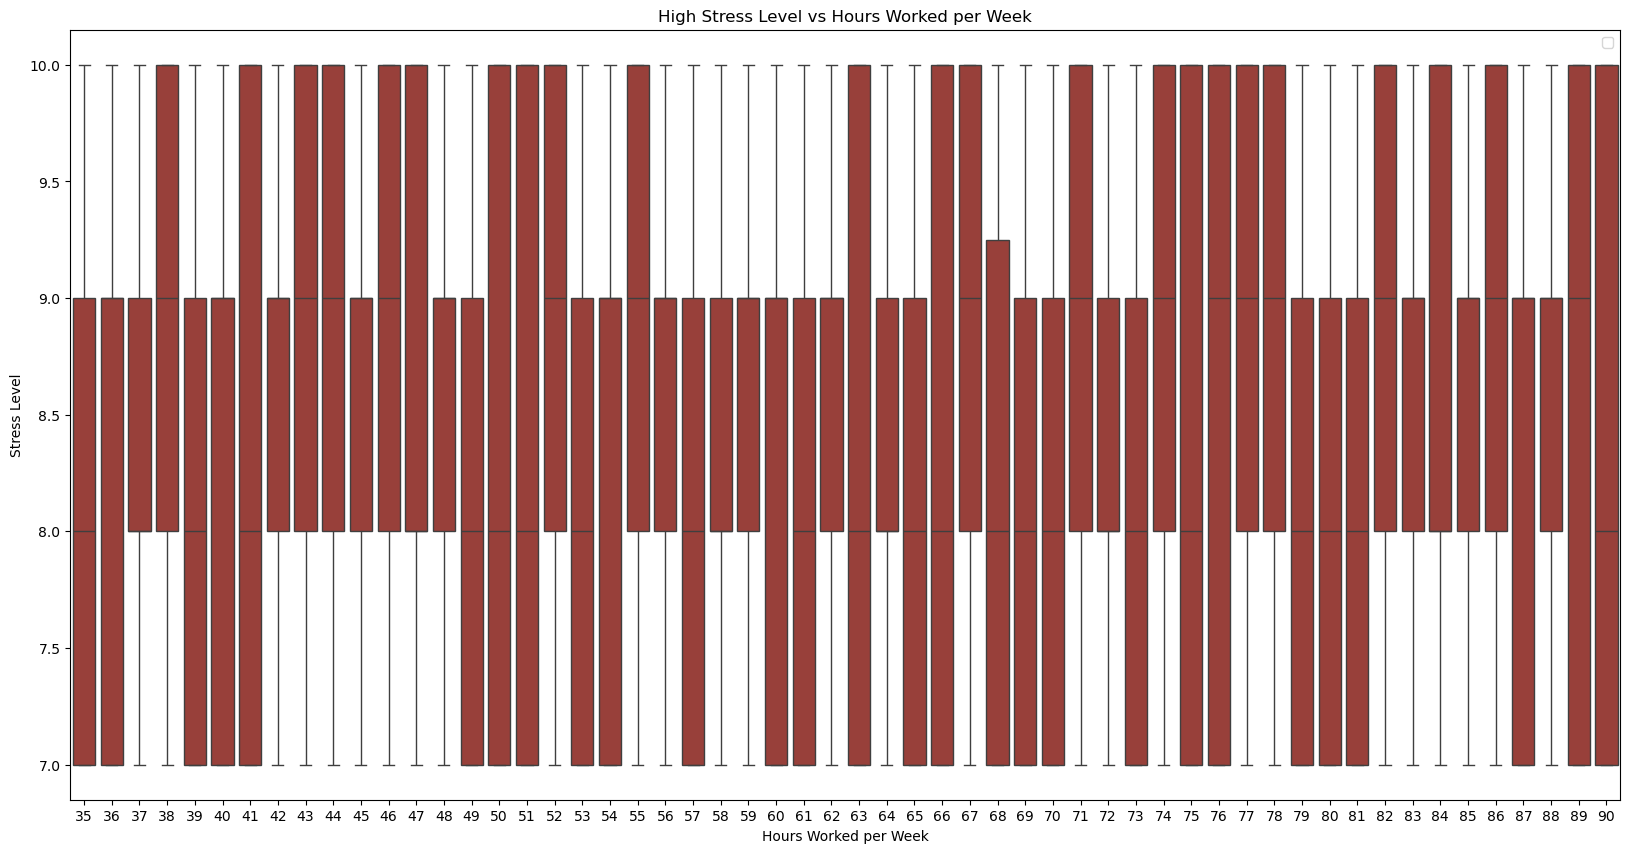

In [112]:
#Box plot for High Stress v Hours worked per week
high_stressy_df = stressy_depressy_df[stressy_depressy_df["Stress Bin"] == pd.Interval(6.0, 10.0)]
plt.figure(figsize=(20, 10))
sns.boxplot(data=high_stressy_df, x='Hours Worked per Week', y='Stress Level 0 - 10', color='#A8332A')
plt.title('High Stress Level vs Hours Worked per Week')
plt.xlabel('Hours Worked per Week')
plt.ylabel('Stress Level')

plt.legend()
plt.show()

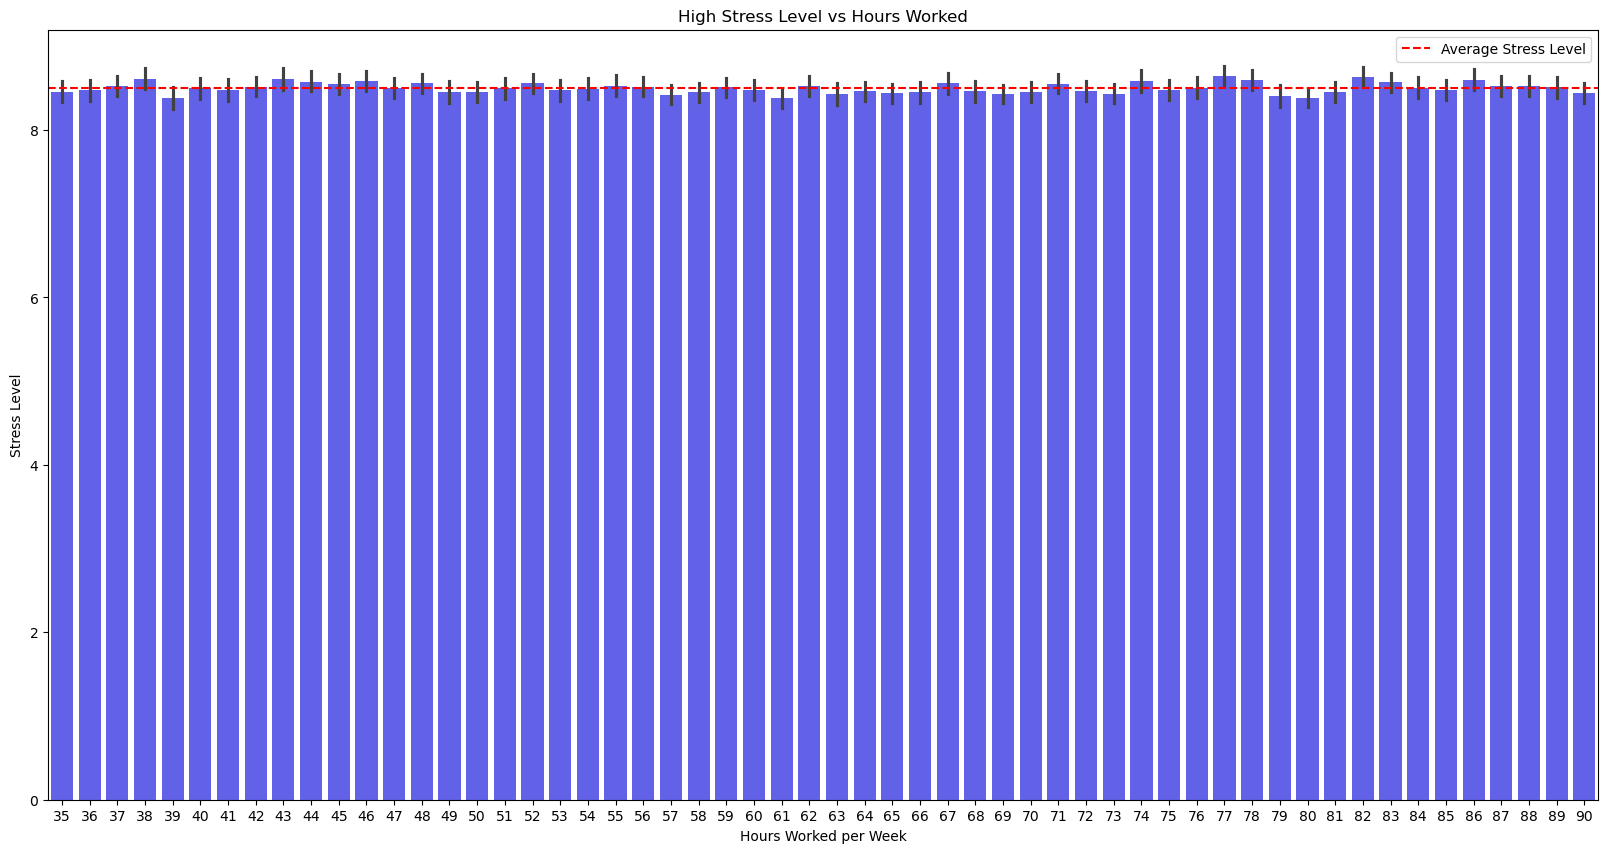

In [113]:
#Bar plot of high stress v hours worked
high_stressy_df = stressy_depressy_df[stressy_depressy_df["Stress Bin"] == pd.Interval(6.0, 10.0)]
plt.figure(figsize=(20, 10))
sns.barplot(data=high_stressy_df, x='Hours Worked per Week', y='Stress Level 0 - 10', color='blue', alpha=0.7)
plt.title('High Stress Level vs Hours Worked')
plt.xlabel('Hours Worked per Week')
plt.ylabel('Stress Level')
plt.axhline(y=high_stressy_df['Stress Level 0 - 10'].mean(), color='red', linestyle='--', label='Average Stress Level')
plt.legend()
plt.show()

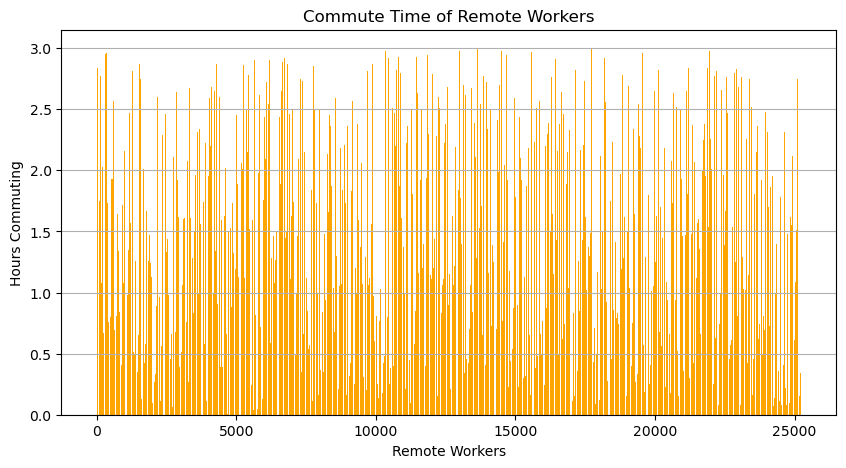

In [114]:
#Commute times of Remote true workers, should be 0, but is not
shameful_df = factors_df[factors_df["Remote Work?"]]

plt.figure(figsize=(10, 5))
plt.bar(range(len(shameful_df)), shameful_df['Hours Commuting'], color='#FFA500')
plt.title('Commute Time of Remote Workers')
plt.xlabel('Remote Workers')
plt.ylabel('Hours Commuting')
plt.grid(axis='y')  # Add gridlines for better readability
plt.show()

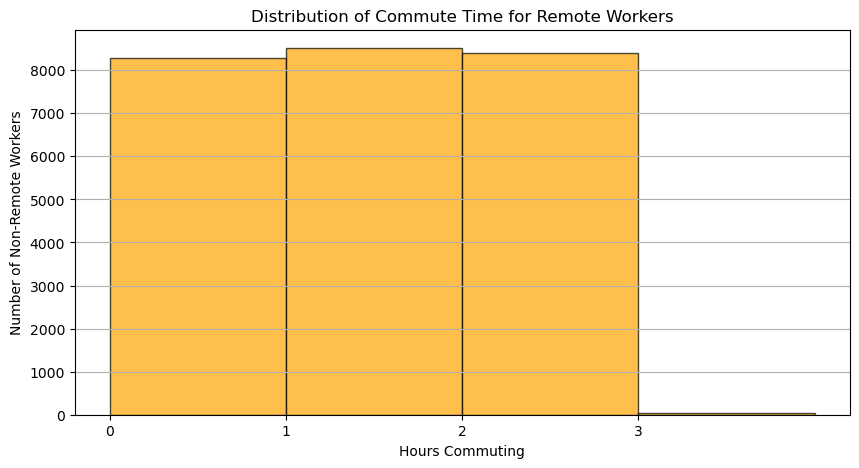

In [115]:
#Distrubution Chart of Remote True workers commute time
shameful_df = factors_df[factors_df["Remote Work?"]]
plt.figure(figsize=(10, 5))
plt.hist(shameful_df['Hours Commuting'], 
         bins=range(0, int(max(shameful_df['Hours Commuting'])) + 2), 
         color='orange', edgecolor='black', alpha=0.7)
plt.title('Distribution of Commute Time for Remote Workers')
plt.xlabel('Hours Commuting')
plt.ylabel('Number of Non-Remote Workers')
plt.xticks(range(0, int(max(shameful_df['Hours Commuting'])) + 1))  # Set x-ticks to show all hour values
plt.grid(axis='y')  # Add gridlines for better readability
plt.show()

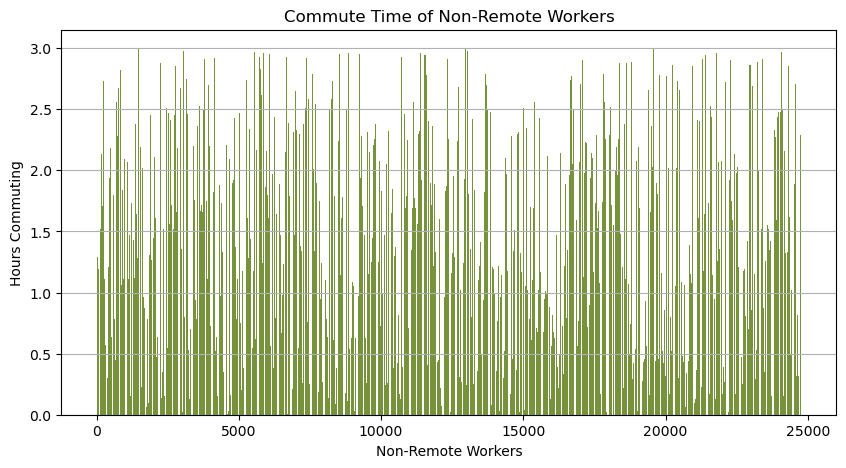

In [116]:
#Bar Chart of Non-Remote workers v commute times
non_remote_df = factors_df[~factors_df["Remote Work?"]]
plt.figure(figsize=(10, 5))
plt.bar(range(len(non_remote_df)), non_remote_df['Hours Commuting'], color='#76933C')
plt.title('Commute Time of Non-Remote Workers')
plt.xlabel('Non-Remote Workers')
plt.ylabel('Hours Commuting')
plt.grid(axis='y')  # Add gridlines for better readability
plt.show()

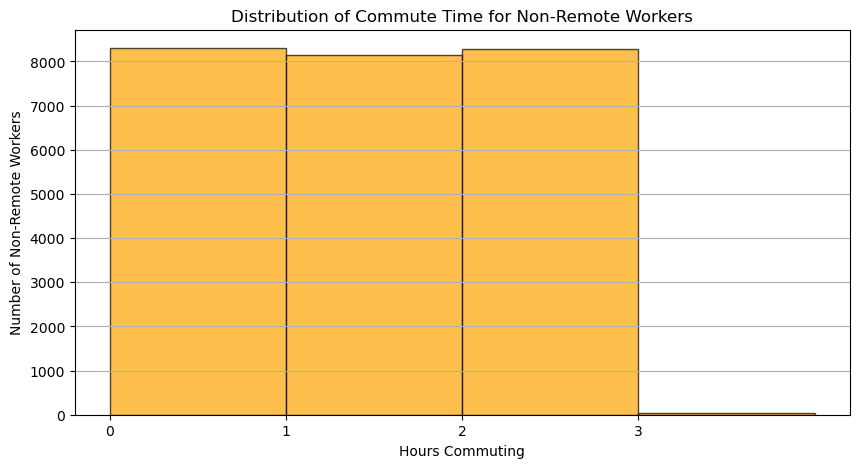

In [117]:
#Distribution Chart of Non-Remote workers
non_remote_df = factors_df[~factors_df["Remote Work?"]]
plt.figure(figsize=(10, 5))
plt.hist(non_remote_df['Hours Commuting'], 
         bins=range(0, int(max(non_remote_df['Hours Commuting'])) + 2), 
         color='orange', edgecolor='black', alpha=0.7)
plt.title('Distribution of Commute Time for Non-Remote Workers')
plt.xlabel('Hours Commuting')
plt.ylabel('Number of Non-Remote Workers')
plt.xticks(range(0, int(max(non_remote_df['Hours Commuting'])) + 1))  # Set x-ticks to show all hour values
plt.grid(axis='y')  # Add gridlines for better readability
plt.show()

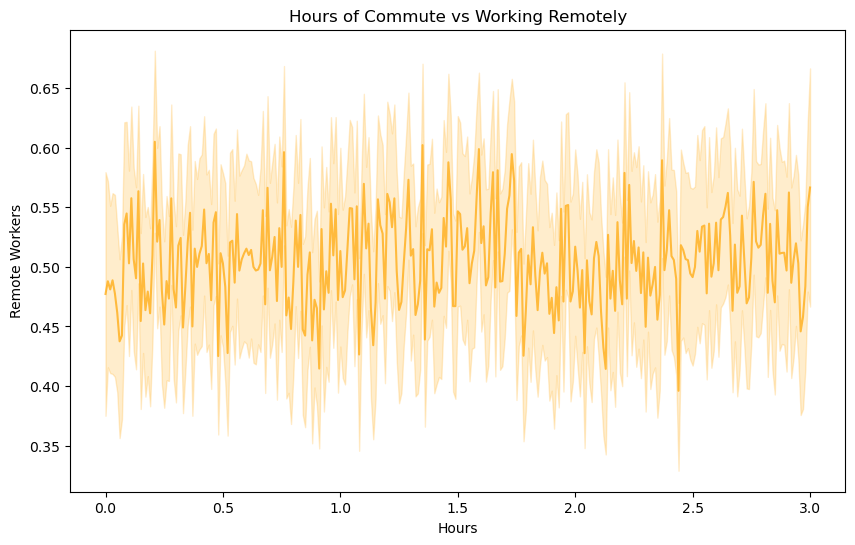

In [118]:
#Line Plot of Remote Workers Commute Time
shameful_df = factors_df[factors_df["Remote Work?"]]
plt.figure(figsize=(10, 6))
sns.lineplot(data=factors_df, x='Hours Commuting', y='Remote Work?', color='orange', alpha=0.7)
plt.title('Hours of Commute vs Working Remotely')
plt.xlabel('Hours')
plt.ylabel('Remote Workers')

plt.show()

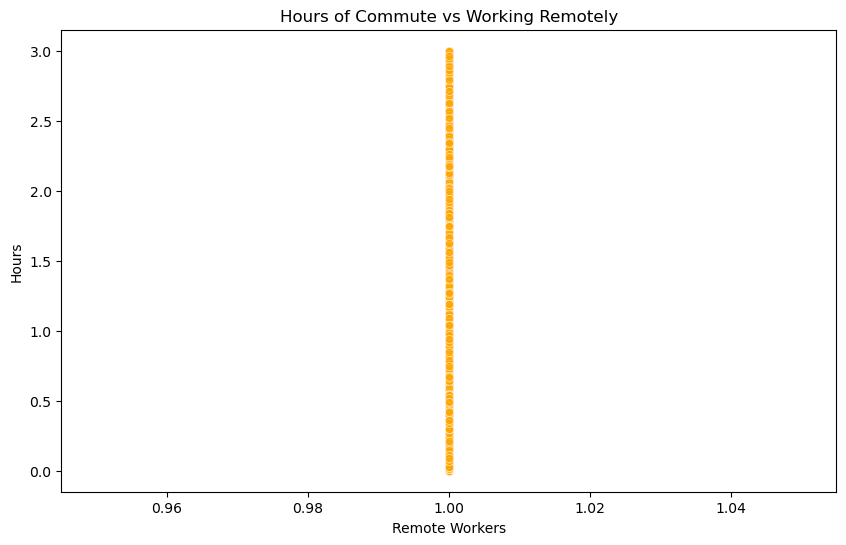

In [119]:
#Scatter Plot of Remote Workers v Hours Commuting
shameful_df = factors_df[factors_df["Remote Work?"]]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=shameful_df, x='Remote Work?', y='Hours Commuting', color='orange', alpha=0.7)
plt.title('Hours of Commute vs Working Remotely')
plt.xlabel('Remote Workers')
plt.ylabel('Hours')

plt.show()